In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [64]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [65]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [67]:
df.corr() #A value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [68]:
X=df.iloc[:,:-1].values # We will not consider the index so .values is used, that considers only the values
y=df.iloc[:,-1].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred=regressor.predict(X_test)

In [73]:
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

Text(0, 0.5, 'Salary')

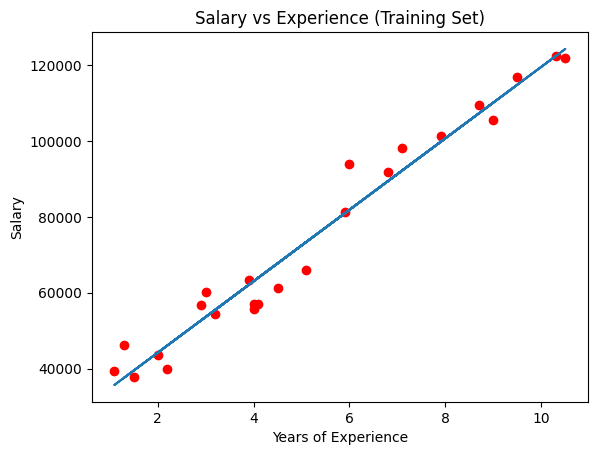

In [74]:
#*Plotting for training set
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

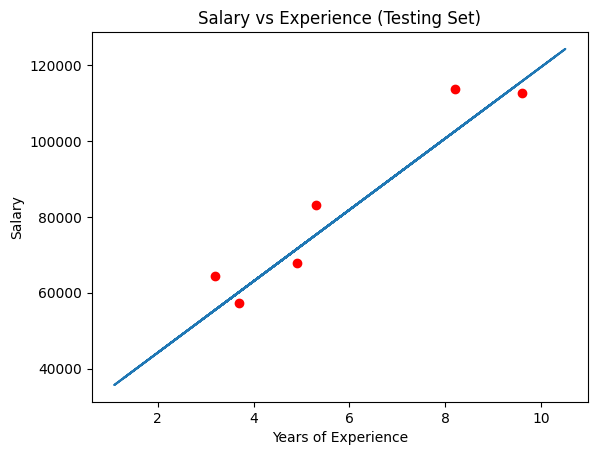

In [75]:
#*Plotting for testing set
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title("Salary vs Experience (Testing Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [76]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [9423.81532303]
Intercept: 25321.583011776813


In [77]:
errors=y_test-y_pred
errors

array([-3155.21011287, -3560.27809463, 11215.13133937,  7820.19577616,
        8967.20795452, -3000.69970699])

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE: ",mean_absolute_error(y_test,y_pred))
print(f"MSE: ",mean_squared_error(y_test,y_pred))

MAE:  6286.453830757749
MSE:  49830096.85590839


In [79]:
def mean_absolute_percentage_error(y_test, y_pred):
    errors = np.abs((y_test - y_pred) / y_test)
    mape = np.mean(errors) * 100
    return mape

# Assuming y_actual and y_pred are your actual and predicted values
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 7.74%


In [80]:
def mean_squared_percentage_error(y_actual, y_pred):
    errors = ((y_actual - y_pred) ** 2) / (y_actual ** 2)
    mspe = np.mean(errors) * 100
    return mspe

# Assuming y_actual and y_pred are your actual and predicted values
mspe = mean_squared_percentage_error(y_test, y_pred)
print(f"Mean Squared Percentage Error (MSPE): {mspe:.2f}%")


Mean Squared Percentage Error (MSPE): 0.74%


In [81]:
def root_mean_squared_percentage_error(y_actual, y_pred):
    errors = ((y_actual - y_pred) ** 2) / (y_actual ** 2)
    rmspe = np.sqrt(np.mean(errors)) * 100
    return rmspe

# Assuming y_actual and y_pred are your actual and predicted values
mspe = root_mean_squared_percentage_error(y_test, y_pred)
print(f"Root Mean Squared Percentage Error (RMSPE): {mspe:.2f}%")

Root Mean Squared Percentage Error (RMSPE): 8.58%


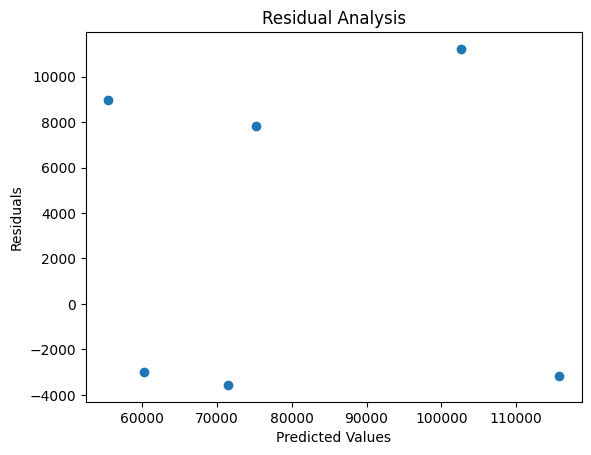

In [82]:
#Residual Analysis:
#Examine the residuals (the differences between predicted and actual values) for patterns.
#A well-fitted model should have randomly distributed residuals with no clear patterns.
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

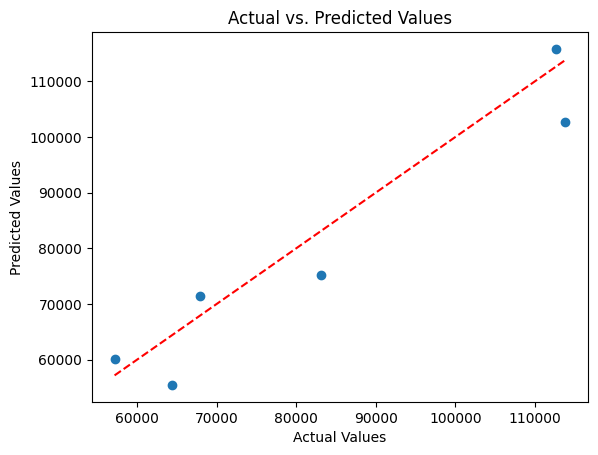

In [83]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
